<a href="https://colab.research.google.com/github/lauracarbaugh/lab_eda/blob/main/Lab2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at: https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from: https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:

1. Download a small (5-15) set of variables of interest. (You can also check out get_gss.ipynb for some processed data.)
2. Write a short description of the data you chose, and why. (~500 words)
3. Load the data using Pandas. Clean them up for EDA. Do this in this notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations.
5. Describe your findings. (500 - 1000 words, or more)

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Since the `GSS.xlsx` file was not found, I will download the selected variables directly from the GSS Data Explorer.

Question 2

For the lab, we chose to download the following variables: wrkstat (labor force status), hrs2 (number of hours typically worked in a week), wrkgovt (government or private employee), commute (travel time to work), and educ (highest year of school completed). Wrkstat, wrkgovt, and educ are categorical variables, and commute and hrs2 and quantitative variables. We chose these variables because we wanted to begin investigating how these variables may relate to each other. For example, we thought that there may be some relationships between wrkstat and educ, hrs2 and wrkgovt, and wrkstat and educ.

The General Social Survey is a nationally representative, long-running survey of adults in the United States, conducted every one or two years since 1972. Because it repeatedly samples the U.S. population, the GSS allows researchers to explore both cross-sectional patterns in a given year and long-term changes over time. By drawing from such a rich and carefully collected source, our analysis gains credibility and broad relevance.

We chose to select variables that capture the relevance in people's working lives. Wrkstat identifies whether someone is employed full time, employed part time, unemployed, retired, a student, or keeping house. Hrs2 quantifies their typical weekly work hours, adding nuance to simple employment status. Wrkgovt distinguishes between government and private sector employment, letting us compare how working hours or commuting times differ between these sectors. Commute measures the time spent traveling to work, an important factor in work–life balance and stress. Finally, educ provides information on highest educational attainment, a well-established predictor of occupational opportunities and wages.

We are hoping to find interesting patterns across these variables. For example, education often influences labor force participation and job type. People with higher educational attainment might be more likely to work in government positions or professional occupations that entail different schedules and commute patterns. Work hours could differ between private and public sectors or by level of education. Analyzing these relationships may reveal how education shapes the quantity and quality of work, as well as daily experiences like commuting.

An important feature of the GSS is its use of skip patterns, where some questions are asked only if previous answers apply. As a result, certain cells in our dataset are labeled “inapplicable.” Rather than being errors, these values indicate that a question was not relevant to a respondent’s situation. We plan to treat these values either as missing data or as a meaningful category.

In [ ]:
# Question 3
import pandas as pd
import numpy as np

# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Question 3
import pandas as pd
import numpy as np

# load in the data
# Assuming the user has downloaded GSS.csv and uploaded it to the Colab environment
try:
    # Update the file path to read from Google Drive
    lab_df = pd.read_csv("/content/drive/My Drive/GSS(Data).csv")
    print("Data loaded successfully from Google Drive")
except FileNotFoundError:
    print("Error: GSS(Data).csv not found in your Google Drive.")
    print("Please make sure the file is named GSS(Data).csv and is in the root directory of your Google Drive.")
    # Create an empty DataFrame to avoid errors in subsequent steps if the file is not found
    lab_df = pd.DataFrame(columns = ['wrkstat', 'hrs2', 'wrkgovt', 'commute', 'educ'])


# clean data in preparation for EDA
# Ensure only the selected columns are kept, just in case the downloaded file contains more.
if not lab_df.empty:
    selected_columns = ['wrkstat', 'hrs2', 'wrkgovt', 'commute', 'educ']
    # Check if all selected columns exist in the DataFrame
    if all(col in lab_df.columns for col in selected_columns):
        lab_df = lab_df[selected_columns].copy() # Use .copy() to avoid SettingWithCopyWarning

        # Replace inapplicable and not applicable values with pandas.NA
        # Based on common GSS codes like '.i' and '.z'
        # The exact codes might vary depending on the downloaded file format,
        # so the user might need to adjust this based on their file.
        lab_df = lab_df.replace({
            r'\.i:.*': pd.NA,
            r'\.z:.*': pd.NA,
            'IAP': pd.NA, # Another common code for Inapplicable
            'NA': pd.NA # Sometimes missing values are represented as 'NA'
        }, regex=True) # Use regex=True to match patterns like '.i: Inapplicable'

        print("\nFirst 5 rows of the cleaned data:")
        display(lab_df.head())

        print("\nData types after cleaning:")
        display(lab_df.info())

        print("\nMissing values after cleaning:")
        display(lab_df.isnull().sum())
    else:
        print("Error: Not all selected columns were found in the loaded data.")
        print(f"Expected columns: {selected_columns}")
        print(f"Columns in loaded data: {lab_df.columns.tolist()}")
        lab_df = pd.DataFrame(columns = selected_columns) # Reset lab_df if columns are missing

else:
    print("lab_df is empty. Data loading failed.")

Data loaded successfully from Google Drive

First 5 rows of the cleaned data:


,wrkstat,hrs2,wrkgovt,commute,educ
0,Working full time,<NA>,<NA>,<NA>,4 years of college
1,Retired,<NA>,<NA>,<NA>,10th grade
2,Working part time,<NA>,<NA>,<NA>,12th grade
3,Working full time,<NA>,<NA>,<NA>,5 years of college
4,Keeping house,<NA>,<NA>,<NA>,12th grade



Data types after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75699 entries, 0 to 75698
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   wrkstat  75699 non-null  object
 1   hrs2     1607 non-null   object
 2   wrkgovt  35364 non-null  object
 3   commute  8223 non-null   object
 4   educ     75699 non-null  object
dtypes: object(5)
memory usage: 2.9+ MB


None


Missing values after cleaning:


,0
wrkstat,0
hrs2,74092
wrkgovt,40335
commute,67476
educ,0


In [ ]:
# Question 4: Numeric Summaries

# Summarize quantitative variables
print("Numeric summary for hours worked per week (hrs2):")
display(lab_df['hrs2'].describe())

print("\nNumeric summary for commute time (commute):")
display(lab_df['commute'].describe())

# Get value counts for the 'educ' column
print("\nValue counts for education level (educ):")
display(lab_df['educ'].value_counts())

Numeric summary for hours worked per week (hrs2):


,hrs2
count,1607
unique,64
top,40
freq,614



Numeric summary for commute time (commute):


,commute
count,8223
unique,40
top,.y: Not available in this year
freq,6853



Value counts for education level (educ):


,count
educ,
12th grade,22202
4 years of college,10666
2 years of college,8651
1 year of college,6188
11th grade,4046
3 years of college,3484
6 years of college,3187
10th grade,3079
8th grade,2812


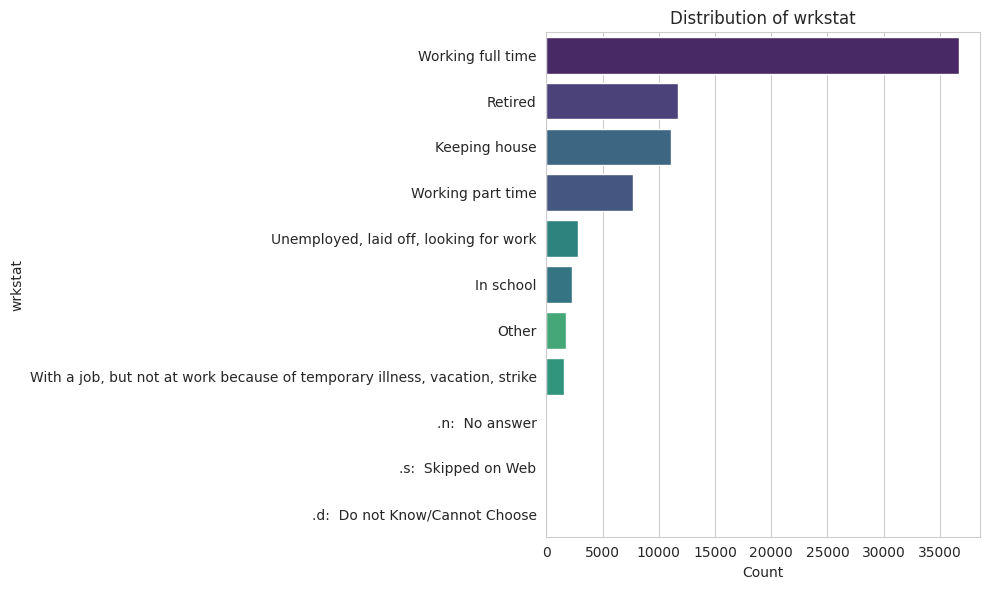

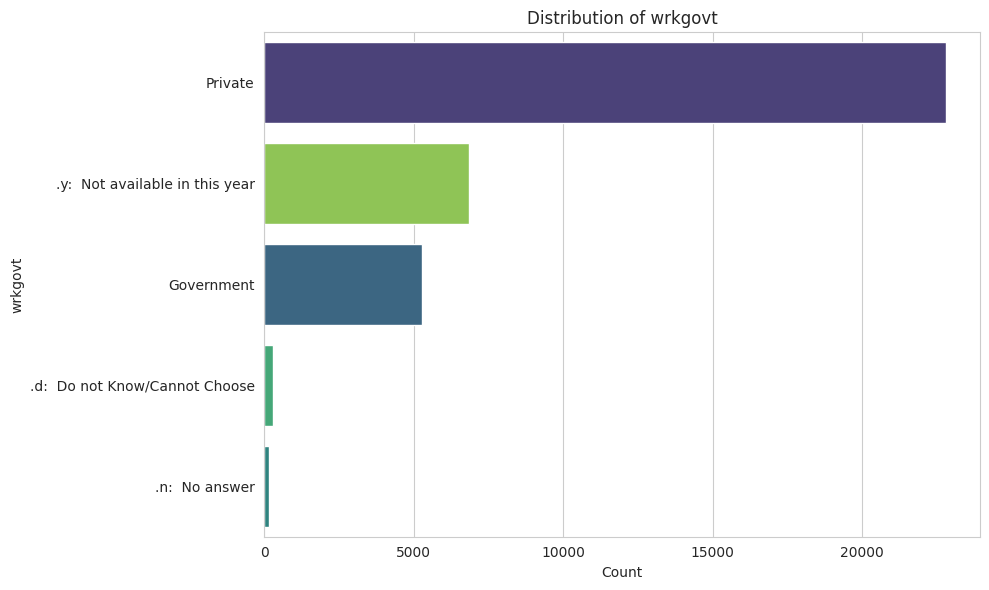

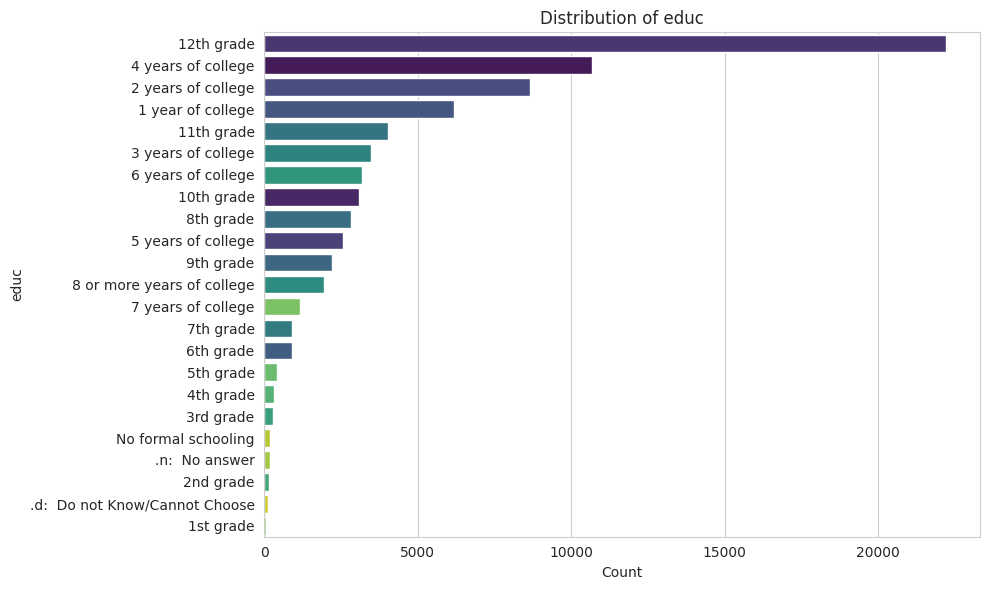

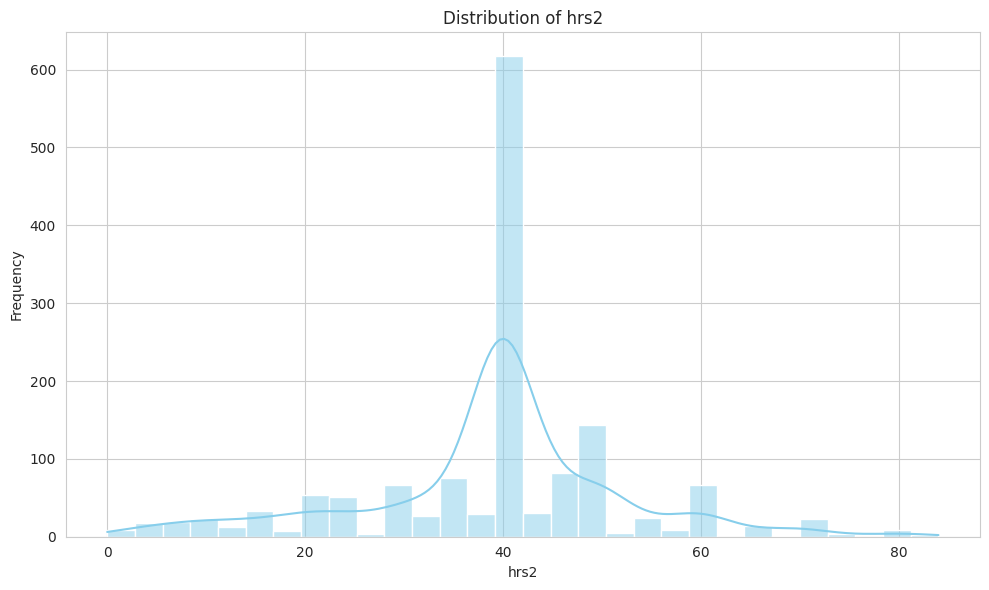

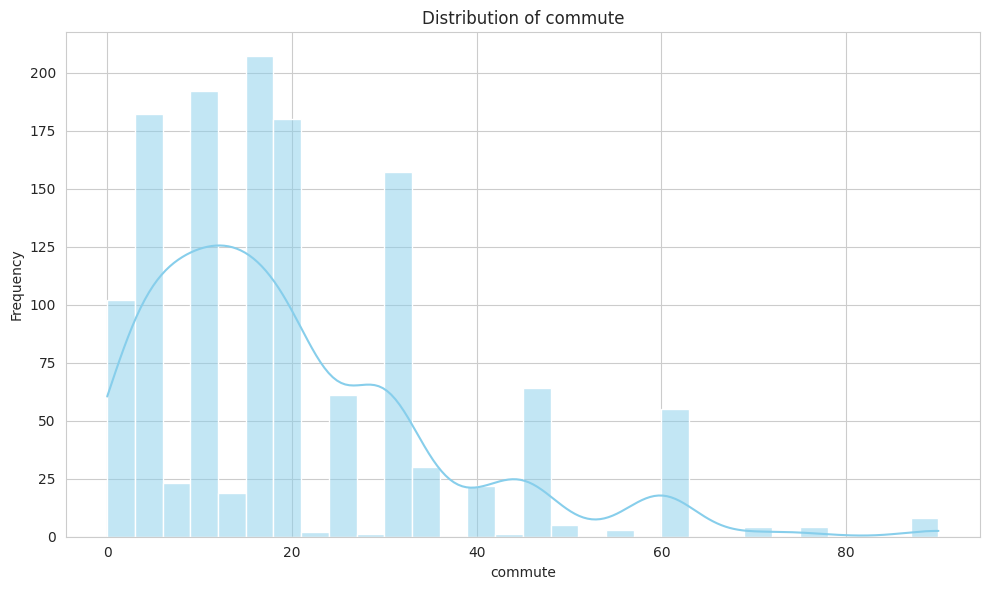

In [ ]:
# Question 4: Visualizations

import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Visualize the distribution of categorical variables
categorical_vars = ['wrkstat', 'wrkgovt', 'educ']
for var in categorical_vars:
    if var in lab_df.columns and not lab_df[var].isnull().all():
        plt.figure(figsize=(10, 6))
        # Updated code to address FutureWarning: Pass the variable to hue and set legend=False
        sns.countplot(data=lab_df, y=var, order=lab_df[var].value_counts().index, hue=lab_df[var], palette='viridis', legend=False)
        plt.title(f'Distribution of {var}')
        plt.xlabel('Count')
        plt.ylabel(var)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Skipping visualization for '{var}' as it's not in the DataFrame or contains only missing values.")

# Visualize the distribution of quantitative variables (handle potential non-numeric data and missing values)
quantitative_vars = ['hrs2', 'commute']
for var in quantitative_vars:
    if var in lab_df.columns and not lab_df[var].isnull().all():
        # Attempt to convert to numeric, coercing errors to NaN
        numeric_data = pd.to_numeric(lab_df[var], errors='coerce').dropna()
        if not numeric_data.empty:
            plt.figure(figsize=(10, 6))
            sns.histplot(data=numeric_data, kde=True, bins=30, color='skyblue')
            plt.title(f'Distribution of {var}')
            plt.xlabel(var)
            plt.ylabel('Frequency')
            plt.tight_layout()
            plt.show()
        else:
             print(f"Skipping visualization for '{var}' as it contains no valid numeric data after cleaning.")
    else:
        print(f"Skipping visualization for '{var}' as it's not in the DataFrame or contains only missing values.")

Question 5:

When looking at the dataset, a few patterns really stand out. The first thing that jumps out is the breakdown of work status. The most common status is definitely “Working full time.” That makes sense, because a lot of people in the survey are probably in the age range where they’re working steady jobs. After that, the next biggest group is “Retired,” which shows there are a good number of older respondents too. Then comes “Keeping house,” which is interesting because it shows unpaid household labor still comes up as a category. Other statuses like being in school or unemployed are much smaller in comparison. Essentially, the dataset is dominated by people either working full time or already retired.

For the variable about hours worked per week (hrs2), only people who are employed answered, so there are fewer total responses (about 1,600). Not surprisingly, the most common answer is 40 hours a week, which lines up with the standard full-time workweek. There are 64 unique values, though, so not everyone works exactly 40 hours. Some probably do part-time shifts, and others might do overtime or work multiple jobs. Even without the exact quartiles, it seems like most people cluster around 35–45 hours, which feels like the “normal” range.

The commute time variable is a bit harder to conceptualize. The dataset has a lot of missing or “not available” responses (over 6,800 out of 8,200). That means only a small fraction of the sample actually reported their commute times and so because of that, it’s hard to say anything certain about the distribution. With so few valid values…we can’t tell whether most people have short commutes or whether there are a lot of really long ones. A histogram would help if there was more data, but in this case, missing data really limits what we can say.

Looking at education levels, the most common is “12th grade,”ater that, the next most frequent are “4 years of college” and “2 years of college.” This shows that a lot of people either stopped after finishing high school or went on to higher education, but the split is pretty even. It’s also a good reminder that even though college is common, it’s not the majority for everyone in the dataset.

When comparing variables, there might be some connections, but it’s not totally clear from just the individual plots. For example, since “Working full time” is the biggest work status and “12th grade” is the most common education level, it’s probably true that a lot of full-time workers only have a high school diploma. But to be really sure, we’d need a combined chart or grouped analysis, like a stacked bar chart or a cross-tabulation. Without that, we can only guess at the overlap.

One thing that really stands out across multiple variables is missing data. Hours worked is only reported by employed people, and commute is missing for most respondents because it wasn’t always asked in certain years. That means these results don’t represent the entire dataset but just a subset and there is an issue of response bias that is affecting the data. It’s important to keep that in mind, because otherwise it might look like certain patterns apply to everyone when they really don’t and there are biases that are altering the authenticity of the data..

Overall, the dataset shows that most people are full-time workers putting in about 40 hours a week, with high school being the most common education level. Retired individuals and people “keeping house” make up the next biggest groups. Education and work status probably connect in some way, but we can’t say for sure without more detailed analysis. Commute data is basically too incomplete to rely on here. The main takeaway is that while the dataset gives us a good picture of full-time workers and their education levels, missing data is a big limitation, especially for commute and hours worked.

